In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


In [3]:
import pydicom


In [5]:
image = pydicom.read_file('/mnt/storage/Evidences/LEAL/series1/80.dcm')
# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(image.Rows), int(image.Columns))
ConstPixelSpacing = (float(image.PixelSpacing[0]), float(image.PixelSpacing[1]), float(image.SliceThickness))
ArrayDicom = np.zeros(ConstPixelDims, dtype=image.pixel_array.dtype)
ArrayDicom[:, :] = image.pixel_array 
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [37]:
image.pixel_array.dtype



dtype('uint16')

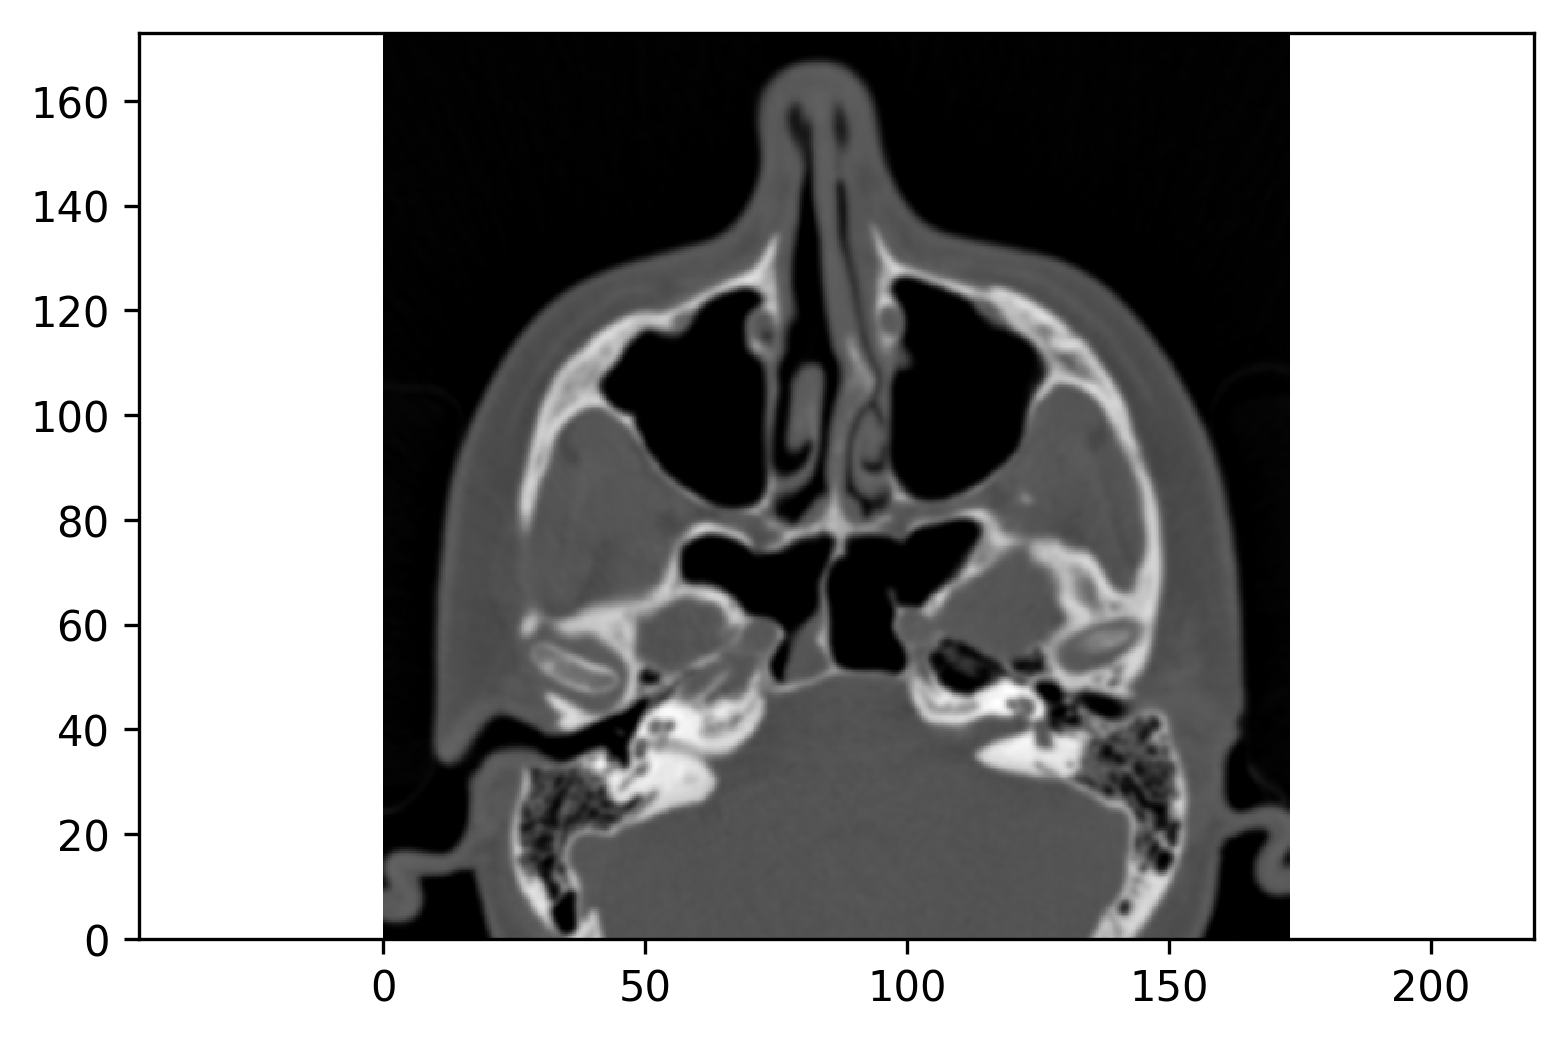

In [33]:
#plt.figure(dpi=300)
#plt.axes().set_aspect('equal', 'datalim')
#plt.set_cmap(plt.gray())
#plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))

In [6]:
#lets open this image like a #!@#!@#! on prom day
min_image_value = np.amin(ArrayDicom)
max_image_value = np.amax(ArrayDicom)
min_max_range = max_image_value - min_image_value
windowed_image = ArrayDicom.copy()

for x in np.nditer(windowed_image, op_flags=['readwrite']):
    x[...] = 255*x/(min_max_range)



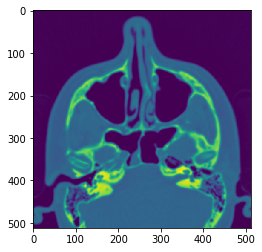

In [7]:
#plt.pcolormesh(x, y, windowed_image[:,:])
plt.imshow(windowed_image, interpolation='nearest')
plt.show()

In [8]:
image = cv2.cvtColor(windowed_image.astype(np.uint8),cv2.COLOR_GRAY2BGR)
piramid_image = shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
true_image = cv2.cvtColor(piramid_image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(true_image,0,255,cv2.THRESH_BINARY +cv2.THRESH_OTSU)

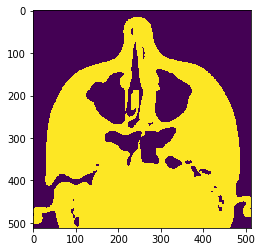

In [9]:

plt.imshow(thresh, interpolation='nearest')
plt.show()

In [10]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [11]:
import math
def pinte_bolinha(centerx, centery,image,radius,value):
    for y in range (centery-radius, centery+radius):
        for x in range(centerx-radius, centerx +radius):
            sqx = centerx -x;
            sqx = sqx*sqx;
            sqy = centery -y;
            sqy = sqy*sqy;
            if math.sqrt(sqy+sqx) < radius:
                image[y,x]=value
                


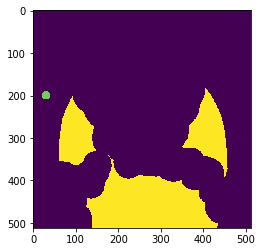

In [12]:
#sure_fg.fill(0)
#for inha in range(254,256):
#    for joluna in range (254,256):
#        sure_fg[inha,joluna]=255
pinte_bolinha(30,200,sure_fg,10,200)
plt.imshow(sure_fg, interpolation='nearest')
plt.show()

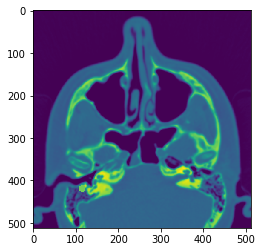

In [13]:
teste = windowed_image.copy()
pinte_bolinha(115,419,teste,8,200)
plt.imshow(teste, interpolation='nearest')
plt.show()

In [14]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
#markers = markers+1
# Now, mark the region of unknown with zero
#markers[unknown==255] = 0

markers.fill(0)
pinte_bolinha(105,199,markers,8,1)
pinte_bolinha(115,419,markers,8,2)
pinte_bolinha(86,99,markers,8,2)
pinte_bolinha(305,199,markers,8,3)
pinte_bolinha(305,419,markers,8,4)

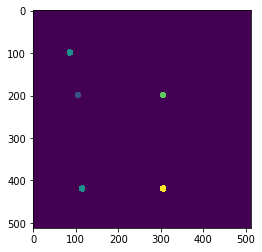

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [15]:
plt.imshow(markers, interpolation='nearest')
plt.show()
markers

In [17]:
colored = cv2.cvtColor(true_image,cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(colored,markers)
colored[markers == 1] = [255,0,0]
colored[markers == 3] = [0,255,0]
colored[markers == 4] = [0,0,255]

In [16]:
true_image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 3, 3, ..., 2, 2, 2],
       [2, 3, 3, ..., 2, 2, 2],
       [2, 3, 3, ..., 2, 2, 2]], dtype=uint8)

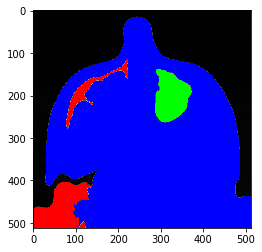

In [328]:
plt.imshow(colored, interpolation='nearest')
plt.show()

In [315]:
import mpld3

ImportError: No module named 'mpld3'